In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from astropy.table import Table
from astropy.table import QTable

In [4]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output/'

In [5]:
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloGrNr', 'SubhaloStellarPhotometrics', 'SubhaloMassType']
#cambiar la masa total por la masa estelar que deberia estar en el array de masstype
snapNum = 99
subhalos = il.groupcat.loadSubhalos(basePath, snapNum, fields=fields)

In [6]:
len(subhalos)

6

In [7]:
gas = np.nonzero(subhalos['SubhaloMassType'][:,0] > 0)

In [8]:
stars = np.log10((subhalos['SubhaloMassType'][:,4])/0.6774) + 10
stars

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


array([12.56885675, 11.74724996, 11.79736423, ...,        -inf,
              -inf,        -inf])

In [9]:
IDstellarmass = np.nonzero(stars > 9.5)[0]
print(IDstellarmass)

[     0      1      2 ... 727485 738596 752194]


In [14]:
erre = subhalos['SubhaloStellarPhotometrics'][IDstellarmass, 5]
ii = subhalos['SubhaloStellarPhotometrics'][IDstellarmass, 6]

Text(0,0.5,'r-i magnitude')

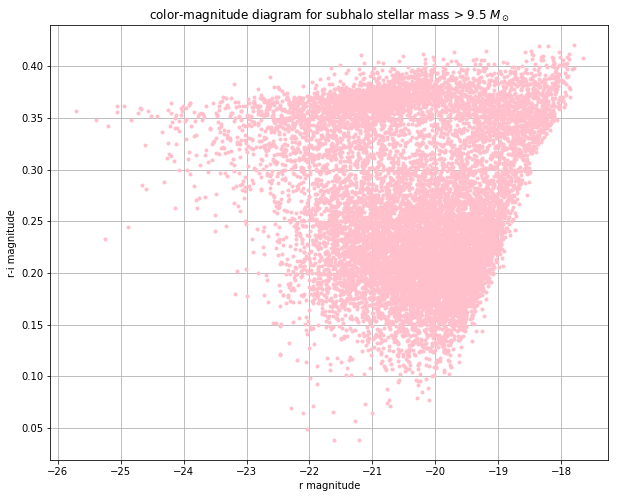

In [15]:
plt.figure(figsize=(10,8))
plt.title('color-magnitude diagram for subhalo stellar mass > 9.5 $M_\odot$')
plt.plot(erre, erre-ii, '.', color='pink')
plt.grid()
plt.xlabel('r magnitude')
plt.ylabel('r-i magnitude')

In [16]:
masita = np.log10((subhalos['SubhaloMassType'][IDstellarmass,4])/0.6774) + 10
masita2 = subhalos['SubhaloMassType'][IDstellarmass,4] #hice esto para ver que tan diferente era

Text(0,0.5,'r-i magnitude')

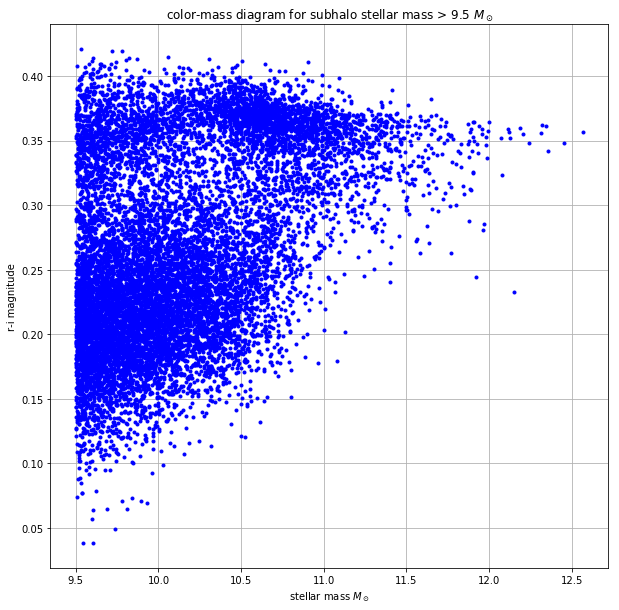

In [17]:
plt.figure(figsize=(10,10))
plt.title('color-mass diagram for subhalo stellar mass > 9.5 $M_\odot$')
plt.plot(masita, erre-ii, '.', color='blue')
plt.grid()
plt.xlabel('stellar mass $M_\odot$')
plt.ylabel('r-i magnitude')

### HALOS

In [18]:
basePath = 'sims.TNG/TNG100-1/output'
fields = ['GroupFirstSub','Group_M_Crit200']
#z=0 group catalogs (snapshot 99)
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

OSError: Unable to open file (unable to open file: name = 'sims.TNG/TNG100-1/output/groups_099/fof_subhalo_tab_099.0.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
#revisar
halos = il.groupcat.loadHalos(basePath, snapNum)

halos1Group_M_Crit200 = []
halos1GroupFirstSub = []


for i in range(len(halos)):
    if np.log10(halos['Group_M_Crit200'][i]/0.6774)+10 >= 13.5:
        halos1Group_M_Crit200.append(np.log10(halos['Group_M_Crit200'][i]/0.6774)+10)
        halos1GroupFirstSub.append(halos['GroupFirstSub'][i])

In [ ]:
fofmass = np.log10(halos['Group_M_Crit200']/0.6774)+10
IDcandidates = np.nonzero(fofmass > 13.5)

idea 22/08:
hacer que imprima el valor de el id de stellar mass jejejeje

In [ ]:
print(len(subhalos['SubhaloGrNr'][IDstellarmass]))
print(len(IDcandidates[0]))

In [ ]:
IDstellarmass